In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#use 
import os 
os.getcwd() 
os.chdir('/content/gdrive/My Drive/app/Darknet_colab') 

In [12]:
!ls

chiatraintest.ipynb  images	model.h5   Untitled0.ipynb  zebra.jpg
cuDNN		     labels	test.txt   Untitled1.ipynb
darknet		     link.gdoc	train.txt  yolov3.weights


In [10]:
import glob, os


# Current directory


current_dir = os.getcwd()+"/Multi-Image-Train"

print(current_dir)

/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train


In [21]:
# Percentage of images to be used for the test set
percentage_test = 10;

# Create and/or truncate train.txt and test.txt
file_train = open('train.txt', 'w')
file_test = open('test.txt', 'w')

# Populate train.txt and test.txt
counter = 1
index_test = round(100 / percentage_test)
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.JPEG")):
  print(pathAndFilename)
  title, ext = os.path.splitext(os.path.basename(pathAndFilename))

  if counter == index_test:
    counter = 1
    file_test.write(current_dir + "/" + title + '.JPEG' + "\n")
  else:
    file_train.write(current_dir + "/" + title + '.JPEG' + "\n")
    counter = counter + 1

/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_003.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_005.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_002.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_004.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/yield_102.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_001.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_043.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_045.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_042.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_044.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_041.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_046.JPEG
/content/gdrive/My Drive/app/Darknet_colab/Multi-Image-Train/rural_035.JPEG
/content/gdr

In [16]:
!ls

chiatraintest.ipynb  labels		test.txt	 yolov3.weights
cuDNN		     link.gdoc		train.txt	 zebra.jpg
darknet		     model.h5		Untitled0.ipynb
images		     Multi-Image-Train	Untitled1.ipynb


In [22]:
%cd darknet


/content/gdrive/My Drive/app/Darknet_colab/darknet


/bin/bash: ./darknet: Permission denied


In [63]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [28]:
#Compile Darknet
!make

chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:

In [52]:
!./darknet detector calc_anchors data/obj.data -num_of_clusters 6 -width 416 -height 416


 num_of_clusters = 6, width = 416, height = 416 
Couldn't open file: data/train.txt


In [34]:
%cd ..

/content/gdrive/My Drive/app/Darknet_colab/darknet


In [60]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [65]:
!./darknet detector train data/obj.data yolov3-tiny-obj.cfg yolov3-tiny.conv.15 -dont_show

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 try to allocate additional workspace_size = 148.84 MB 
 CUDA allocate done! 
Loaded: 0.327542 seconds

 5631: 0.127809, 0.142688 avg loss, 0.001000 rate, 0.635193 seconds, 360384 images
Loaded: 0.092049 seconds
libpng warning: iCCP: known incorrect sRGB profile

 5632: 0.126533, 0.141072 avg loss, 0.001000 rate, 0.674721 seconds, 360448 images
Loaded: 0.147152 seconds

 5633: 0.138498, 0.140815 avg loss, 0.001000 rate, 0.653022 seconds, 360512 images
Loaded: 0.154401 seconds

 5634: 0.182356, 0.144969 avg loss, 0.001000 rate, 0.614240 seconds, 360576 images
Loaded: 0.117552 seconds
libpng warning: iCCP: known incorrect sRGB profile

 5635: 0.122162, 0.142688 avg loss, 0.001000 rate, 0.646577 seconds, 360640 images
Loaded: 0.469067 seconds

 5636: 0.136402, 0.142060 avg loss, 0.001000 rate, 0.637161 seconds, 360704 images
Loaded: 0.234547 seconds
^C


In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [70]:
!./darknet detector test data/obj.data yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_5000.weights data/test.JPEG -i 0 -thresh 0.15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [68]:
!./darknet detect yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_5000.weights data/test.JPEG -dont-show

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

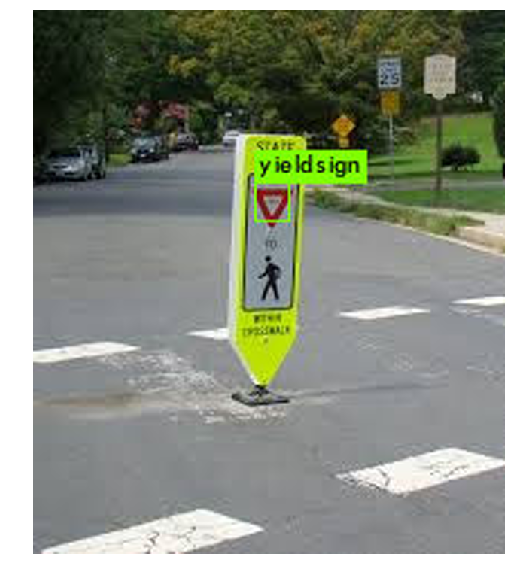

In [71]:
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [73]:
!./darknet detector test data/obj.data yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_5000.weights data/test1.jpg -i 0 -thresh 0.15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

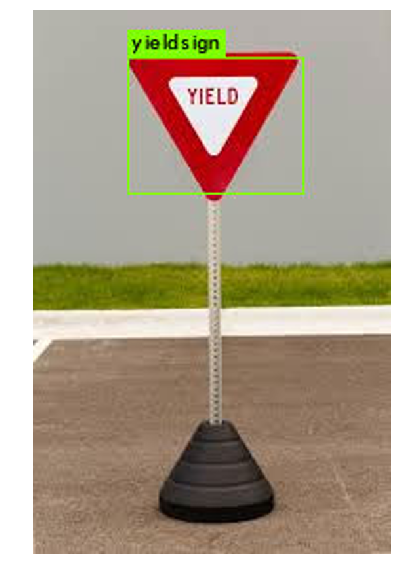

In [74]:
# Show the result using the helper imgShow()
imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

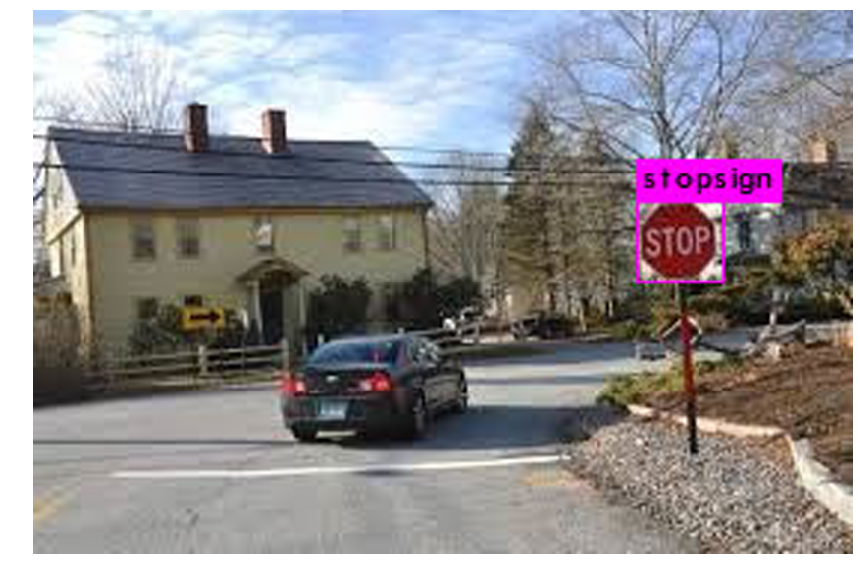

In [75]:
!./darknet detector test data/obj.data yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_5000.weights data/077.jpg -i 0 -thresh 0.15
# Show the result using the helper imgShow()
imShow('predictions.jpg')